# **Review of tips dataset**
## **Table of contents**
* [Introduction](#Introduction)
* [Setup](#Setup)
* [What is the tips dataset?](#What-is-the-tips-dataset?)
* [Some statistics on the dataset](#Some-statistics-on-the-dataset)
* [Description of dataset](#Description-of-dataset)
* [Skewness and kurtosis of dataset](#Skewness-and-kurtosis-of-dataset)
* [Correlation of the dataset](#Correlation-of-the-dataset)
* [Plotting statistics](#Plotting-statistics)
* [Description discussion](#Description-discussion)
* [Regression analysis: Table bill vs tips](#Regression-analysis:-Table-bill-vs-tips)
* [Best fit and mean fit lines](#Best-fit-and-mean-fit-lines)
* [Regression discussion](#Regression-discussion)
* [Some other analysis](#Some-other-analysis)
* [Time of dinner](#time-of-dinner)
* [Smoker](#Smoker)
* [Description of new datasets](#Description-of-new-datasets)
* [Correlation of the new datasets](#Correlation-of-the-new-datasets)
* [Skewness and kurtosis of new datasets](#Skewness-and-kurtosis-of-new-datasets)
* [Plotting other analysis](#Plotting-other-analysis)
* [Discussion of other analysis](#Discussion-of-other-analysis)
* [Further potential analysis](#Further-potential-analysis)
*[Bibliography](#Bibliography)

## **Introduction**
In this notebook, it is intended to review the tips dataset, which can be found online. To do this, a number of approaches will be taken. The first step will be to review the data using standard descriptive statistics, such as mean, mode, median, quartile ranges, standard deviation, etc. Other information will also be gleaned, such as the skewness, and kurtosis of the data (this will be explained in the relevant section), as well as correlation and covariance between certain data sets.

A second step will be to conduct some analysis between the fields of total-bill and tip, to determine a relationship. This analysis will also include both a best fit, and a mean fit lines. These lines can be used for various reasons, and will be discussed in the regression analysis section.

The third section, two subsets of the data will be extricated from the data, and compared to each other. The two subsets of the data chosen for this analysis are the time that the diner at the location, as well as whether the diner was a smoker or not. Similar analysis will conducted with regards to these two data sets, as was conducted on the overall dataset. A discussion of the results can be found in the discussion of further analysis section.

A final section covers other potential analysis that could be undertaken, using the same dataset.

The tips dataset that was used in the below was sourced from [here](http://https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv). Note the data here is the raw form, to make it easier to import into our code.

*Note: in this text, a number of ideas, or explanations may be mentioned. These have all been sourced either from the works listed in the bibliography, or from the author’s own ideas. For the sake of legibility, unless a direct quote, comparison, or specific suggestion is used, it will not be cited in the standard academic (Harvard) manner.
### Setup
Before running any analysis of the data, it is necessary to import the data, and the libraries that we will be using. In this case, it is intended to import the following libraries:
- **Numpy**: To run some functions for analysis.
- **Pandas**: The dataset will be held in various pandas dataframes. The pandas library will also be used to conduct various analytical exercises.
- **Seaborn**: Will be used for various plotting functionality.
- **Matplotlib.pyplot**: For use in some graphing functionality.

Additionally, throughout this notebook, the main dataframe that will hold the dataset will be called *tips_ds*. The below code is used to import the libraries and dataset.

In [121]:
# Initial setup of tips dataset

# Importation of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load tips dataset

# Source URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

# Creation of tips_ds dataframe
tips_ds = pd.read_csv(url)

It should be noted that the above code does not have any outputs. The confirmation that the code was successfully imported can be found at the end of [What is the tips dataset?](#What-is-the-tips-dataset?) (below).

## **What is the tips dataset?**
The tips dataset is a set of data that is often used to teach analytical skills, especially around the segregation of data, and analysis of a group, or a whole set. Additionally, it could be used for extrapolation of data, where the data in question is not included in the actual dataset. The data forms part of a tutorial for the Python Seaborn package, and is used to demonstrate how to conduct plotting of data in Python.

This information that was recorded fell into 7 different columns. These were:
- **total-bill**: the total bill for each meal (numerical values to two decimal places).
- **tip**: the tip received for each meal (numerical values to two decimal places).
- **sex**: gender of the table (either male or female. Doesn’t note if this was the gender of the payer, but would be safe to assume so).
- **smoker**: whether the table being served was in a smoking or non-smoking section (this was California in the 1990s after all)
- **day**: day of the week that the meal was being served. Covers only Thursday to Sunday.
- **time**: the time of day that the service was being conducted. Broken down as either lunch or dinner service.
- **size**: the number of people in the party (whole numerical value).
In total the collector made 244 entries into the dataset.

All the above data can be confirmed by Python.

In [122]:
# Confirmations
print()
print("Confirmation of tips dataset shape, and types")
print()
print("Rows,", "Cols")
print(tips_ds.shape)
print()
print("Data types")
print(tips_ds.dtypes)


Confirmation of tips dataset shape, and types

Rows, Cols
(244, 7)

Data types
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


***
## **Some statistics on the dataset**
In order to be able to work with the dataset, and draw any conclusions from the data, it is important to determine some of the dataset’s properties. In order to do this, we will extract basic measures, more commonly known as descriptive statistics. These statistics can then be used as a guide to further analysis, and comparison. 
#### Description of dataset
The initial set of descriptive statistics are the mean, mode, and median of the data, as well as standard deviation, quartiles, and min and max values. Luckily, pandas has the ability to provide the values for most of these statistics, using the *describe* function. However, while this is useful, it is also necessary to understand what the terms provided by the *describe* function actually mean.
- **Mean**: Also known as the simple average, is the sum of all the values divided by the number of values being summed.
- **Standard deviation**: A measure of how are a number is from the mean. In a perfectly normal distribution, ~68% of all values would be within 1 standard deviation of the mean. Represented in the *describe* output as *std*.
- **min**: The lowest value within the dataset.
- **25%**: The value for the 25th percentile. In other words, 25% of all the values in the dataset are below this value.
- **50%**: The value for the 50% percentile. In other words, 50% of all the values in the dataset are below this value. This value is often called the median value.
- **75%**: The value for the 75th percentile. In other words, 75% of all the values in the dataset are below this value.
- **Max**: The largest value in the dataset.

The values for the tips dataset are retrieved as follows:

In [123]:
# Describe function for the tips dataset
print()
print("Descriptions of the tips dataset")
print()
print(tips_ds.describe())


Descriptions of the tips dataset

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


As we can see, certain measures from the descriptive statistics such as mode, skewness, and kurtosis are missing from the *describe* functionality. These statistics also give rise to important information regarding the dataset. The [skewness and kurtosis](#Skewness-and-kurtosis-of-new-datasets) will be dealt with in their respective section. This leaves the mode to be ascertained. 

The mode of a set of numbers, is the number that appears most often within that set. It is not necessarily close to the median or mean of a dataset, and can be well outside the 1st standard deviation of the data (this can happen when the distribution of the data is skewed). If no number appears most often (i.e. no number appears more often than any other number), then there is no mode for the data. Additionally, unlike the mean, and median statistics, which need to have numbers to work, the *mode* function can work on any set of data.

Using pandas, the mode can be determined using the *mode* function.

In [124]:
# Mode function for the tips dataset
print()
print("Mode for the tips dataset")
print()
print(tips_ds.mode())


Mode for the tips dataset

   total_bill  tip   sex smoker  day    time  size
0       13.42  2.0  Male     No  Sat  Dinner     2


The *describe* function only returns data for numerical fields, while the *mode* function included information on the mode of the columns that contained string. The *describe* function can be used to provide some descriptive statistics on the data in the non-numerical columns. This is done by the inclusion of the *include=[np.object]* argument in the *describe* function. In addition to the statistics returned in the original extract, the following statistics are provided:

- **Unique**: The number of unique values to be found in the column.
- **Top**: The value returned most frequently in the column. Should return the same value as the *mode* function.
- **Freq**: The frequency of the most commonly returned value from top/mode.

Using this *describe(include=[np.object])* function, the following values are returned for the tips dataset.

In [125]:
# Describe(include=[np.object]) function for the tips dataset

print()
print("Descriptive statistics for the non-numerical columns")
print()
print(tips_ds.describe(include=[np.object]))


Descriptive statistics for the non-numerical columns

         sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


As we can see the *describe(include=[np.object])* functionality provides additional clarity to the *mode* function for the dataframe.
#### Skewness and kurtosis of new datasets

The skewness and kurtosis are interrelated terms that are used to describe the nature of the distribution of the dataset, and how it differs from a normally distributed dataset. The definition of these terms are:
- **Skewness**: the direction and amount of asymmetry of the dataset about its mean. If the absolute value of the skewness is:
> - greater than 1, the data is highly skewed and the distribution is very asymmetric.
> - greater than 0.5 and less than 1, the data is moderately skewed, and the distribution is somewhat asymmetric.
> - greater than 0, and less than 0.5, the distribution of the data is approximately symmetric.
> - equal to 0, the data is normally distributed, and symmetric.

The sign of the skewness (i.e. positive or negative) also determines the skewness. Negative skewness indicates that the distribution is skewed to the left, the mean being less than the median, which is less than the mode. Positive values of skewness indicate the opposite, with the distribution being skewed to the right, and the mode being less than the median, which is less than the mean.
- **Kurtosis**: the kurtosis of a dataset indicates the sharpness, or flatness, of the peak of the data (around the mode, or mean, depending on the skewness). 

The kurtosis is measure against the normal distribution, which has a kurtosis of 0. If the kurtosis is negative, then distribution of the data has a smaller standard deviation, as more values are grouped near the mean. This gives the distribution a sharper, and higher peak, and narrower body. A positive kurtosis indicates that there is less grouping around the mean, and indicating that the distribution has a larger standard deviation. This also gives the distribution a flatter, and lower peak, and a wider body.

In pandas, the skewness and kurtosis of a dataset can be ascertained using the *skew* and *kurt* functions. These functions return values for each numeric column within the data set.

In [126]:
# Skewness and kurtosis of the dataframe
print()
print("Skewness")
print("Total bill: %1.5f" % tips_ds["total_bill"].skew())
print("Tips: %13.5f" % tips_ds["tip"].skew())
print("Size: %13.5f" % tips_ds["size"].skew())
print()
print("Kurtosis")
print("Total bill: %1.5f" % tips_ds["total_bill"].kurt())
print("Tips: %13.5f" % tips_ds["tip"].kurt())
print("Size: %13.5f" % tips_ds["size"].kurt())


Skewness
Total bill: 1.13321
Tips:       1.46545
Size:       1.44788

Kurtosis
Total bill: 1.21848
Tips:       3.64838
Size:       1.73170


#### Correlation
Correlation is a statistic that can be used to measure how well two sets of data correspond to each other. Weisstein (2019) defines correlation as *“the degree to which two or more quantities are linearly associated.* As such, a correlation coefficient can be calculated that shows the relationship between the two sets of variables, as well strength of the relationship.

In correlation analysis, positive values show that the two sets of data are positively correlated (i.e. as one value rises or falls, so does the other). Conversely, negative values indicate that the two data sets are negatively or inversely correlated (i.e. as one value rises, or falls, the other falls, or rises). A zero value indicates that there is no relationship between the two sets of data. The strength of the relationship is indicated be the actual value of the correlation coefficient. An absolute value above 0.5 is considered a strong correlation, and above 0.75 is a very strong correlation. A value of -1 or 1 means that the two sets of data are perfectly correlated (i.e. either perfectly positive or perfectly negative correlation).

In pandas dataframes, the *corr* function can be used to ascertain the correlation between numeric sets of data.

In [127]:
# Correlation analysis fot the tips dataset
print()
print("Correlation coefficient for the tips dataset")
print()

# Create new dataframe for the correlation coefficient values
tips_corr_ds = tips_ds.corr(method="pearson")

# As each column will be perfectly correlated with itself, there is no need to show these values
# Replace the values of 1 with a blank value
tips_corr_ds = tips_corr_ds.replace({1.00000: ""})

# Print the new dataframe to show the correlation coefficients of the tips dataset
print(tips_corr_ds)


Correlation coefficient for the tips dataset

           total_bill       tip      size
total_bill             0.675734  0.598315
tip          0.675734            0.489299
size         0.598315  0.489299          


As there are 3 sets of numeric data, the correlation gives a 3x3 grid of data (with the diagonal self-correlation coefficient blanked out).
#### Plotting statistics
Before a discussion of the statistics that were determined, it is useful to plot some of the statistics determined. In this case, it would be useful to plot the *total_bill* and *tip* columns, which will show the skewness of the distribution. 


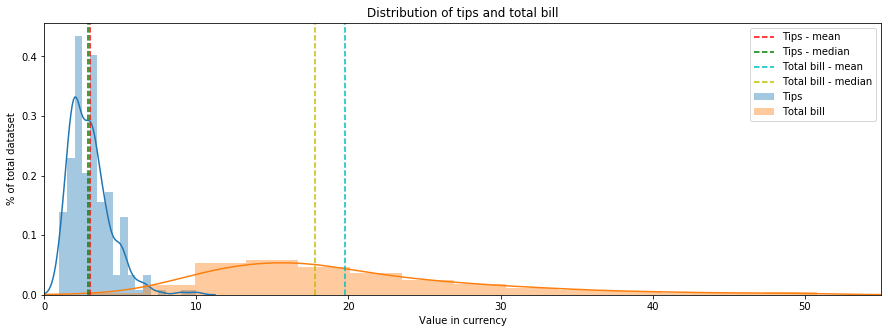

In [128]:
# Plot of distribution of tip and total bill data

# For total bill, new values for mean and median values
tb_mean = tips_ds["total_bill"].mean()
tb_median = tips_ds["total_bill"].median()
tb_mode = tips_ds["total_bill"].mode()

# For tip, new values for mean and median values
t_mean = tips_ds["tip"].mean()
t_median = tips_ds["tip"].median()
t_mode = tips_ds["tip"].mode()

# Seaborn distplots showing both histograms and bell curves for tips and total bill
sns.distplot(tips_ds["tip"], axlabel = False, label="Tips")
sns.distplot(tips_ds["total_bill"], axlabel = False, label="Total bill")

# Plotlines for tips of mean and median
plt.axvline(t_mean, color = 'r', linestyle = "--", label = "Tips - mean")
plt.axvline(t_median, color = 'g', linestyle = "--", label = "Tips - median")

# Plotlines for total bill of mean and median
plt.axvline(tb_mean, color = 'c', linestyle = "--", label = "Total bill - mean")
plt.axvline(tb_median, color = 'y', linestyle = "--", label = "Total bill - median")

# Set limit of x-axis from to 55
plt.xlim([0,55])

# Set size of plot area
plt.rcParams["figure.figsize"] = [15,5]

# Set title, labels, and legend
plt.title("Distribution of tips and total bill")
plt.xlabel("Value in currency")
plt.ylabel("% of total datatset")
plt.legend()

# Show plot
plt.show()

#### Description discussion
The descriptive statistics for the *tip* dataset give a fair detail with regards to the data. 
##### Correlation
If we work in reverse order of statistics provided, we can see the relationship between the *total_bill* and tip values. The correlation value is 0.676, which is in the upper 1/3 of the strong correlation. It is also positive. This suggests that there is a strong relationship between the size of the bill and the tip. There is also a strong relationship between the *total_bill*, and the size of the party. Both of these are to expected, as generally, the larger the party, the larger the bill.

There is, however, a medium to strong relationship between the size of the party, and the left. This is somewhat surprising, as *tip* in the USA are generally a fixed percentage of the bill. This could indicate that the larger the party, the less generous the tipper felt. However, it should be cautioned that a large party leaving a small tip could affect this outcome. The removal of the outliers for the party size (75% of parties were 3 people or less, while the largest was 6 people) could increase this correlation.
##### Skewness and Kurtosis
Looking first at the kurtosis, the value of 3.65 for the tip data set suggest that there will be a distribution with sharp peak, and narrow body, with few outliers, when plotted. By contrast, the kurtosis for the *total_bill* is given as 1.22. This suggests a more humped distribution, with a low, smooth peak, and a wide body, with numerous returns in the tails to either side. The plot of both the *total_bill* and tip values shows that the kurtosis expectations are met. 

Visually, it can be seen that both plots are skewed to the right, with the mean greater than the median. This is as expected, and is confirmed by the returned values for mean, mode, and median, that were calculated in the first section of the statistics.

To note: it is somewhat difficult to distinguish between the mean and median for the *tip* data, as they are very close. However, when splitting out the *tip* data, and plotting separately, they can clearly be seen.

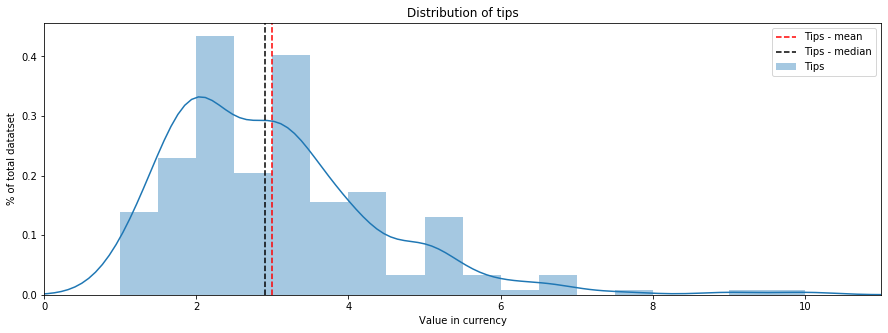

Mean > median > mode for tip data
Mean:   2.998
Median: 2.900
Mode:   2.000


In [129]:
# Plot of distribution of tip data

# Seaborn distplots showing both histograms and bell curves for tips
sns.distplot(tips_ds["tip"], axlabel = False, label="Tips")

# Plotlines for tips of mean and median
plt.axvline(t_mean, color = 'r', linestyle = "--", label = "Tips - mean")
plt.axvline(t_median, color = 'k', linestyle = "--", label = "Tips - median")

# Set limit of x-axis from 0 to 11
plt.xlim([0,11])

# Set size of plot area
plt.rcParams["figure.figsize"] = [15,5]

# Set title, labels, and legend
plt.title("Distribution of tips")
plt.xlabel("Value in currency")
plt.ylabel("% of total datatset")
plt.legend()

# Show plot
plt.show()

# Mean, median, and mode values for the tip data
print("Mean > median > mode for tip data")
print("Mean: %7.3f" % tips_ds["tip"].mean())
print("Median: %1.3f" % tips_ds["tip"].median())
print("Mode: %7.3f" % tips_ds["tip"].mode())

Combining the same vairables for the *total_bill* set of data, with a plot gives clearer results as well.

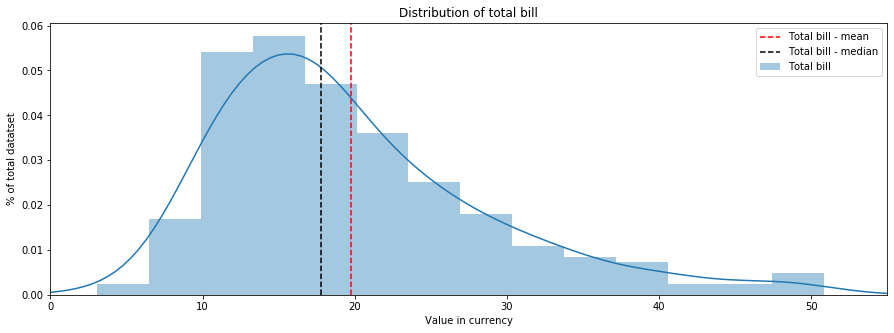

Mean > median > mode for tip data
Mean:   19.786
Median: 17.795
Mode:   13.420


In [130]:
# Plot of distribution total bill data

# For total bill, new values for mean and median values
tb_mean = tips_ds["total_bill"].mean()
tb_median = tips_ds["total_bill"].median()
tb_mode = tips_ds["total_bill"].mode()

# Seaborn distplots showing both histograms and bell curves for total bill
sns.distplot(tips_ds["total_bill"], axlabel = False, label="Total bill")

# Plotlines for total bill of mean and median
plt.axvline(tb_mean, color = 'r', linestyle = "--", label = "Total bill - mean")
plt.axvline(tb_median, color = 'k', linestyle = "--", label = "Total bill - median")

# Set limit of x-axis from to 55
plt.xlim([0,55])

# Set size of plot area
plt.rcParams["figure.figsize"] = [15,5]

# Set title, labels, and legend
plt.title("Distribution of total bill")
plt.xlabel("Value in currency")
plt.ylabel("% of total datatset")
plt.legend()

# Show plot
plt.show()

# Mean, median, and mode values for the tiotal_bill data
print("Mean > median > mode for tip data")
print("Mean: %8.3f" % tips_ds["total_bill"].mean())
print("Median: %1.3f" % tips_ds["total_bill"].median())
print("Mode: %8.3f" % tips_ds["total_bill"].mode())

##### Standard deviation and quartiles
Once again looking at the *tip* and *total_bill* sets of data, the initial descriptive statistics gave a standard deviation of 8.9 and 1.34 respectively. This would indicate that that ~68% of all the  data points for these two data sets would fall into a range of the mean less the standard deviation to the mean + the standard deviation. This can be checked using the following script.

In [131]:
# Check if standard deviation is correct for tips and total_bill sets of data

# Total bill
# Create new dataframe for total bill only
tb_only = tips_ds["total_bill"]

# Determine the lower and upper bounds for the 1st standard deviation
STD_lower = tb_only.mean() - tb_only.std()
STD_upper = tb_only.mean() + tb_only.std()

# Apply the lower and upper std bounds to filter the total bill dataframe
tb_std_range = tb_only.loc[(tb_only >= STD_lower) & (tb_only <= STD_upper)]

# Tip
# Create a new dataframe for tip only
t_only = tips_ds["tip"]

# Determine the lower and upper bounds for the 1st standard deviation
STD_lower = t_only.mean() - t_only.std()
STD_upper = t_only.mean() + t_only.std()

# Apply the lower and upper std bounds to filter the tip dataframe
t_std_range = t_only.loc[(t_only >= STD_lower) & (t_only <= STD_upper)]

# Print the results
print("Total bill set of data")
print("-----------------------")
print("Lower range of 1st standard deviation: %5.2f" % STD_lower)
print("Upper range of 1st standard deviation: %5.2f" % STD_upper)

# Count the length of the filtered total bill dataframe
# and divide by the length of the unfiltered total bill dataframe
# to get a percentage of results within the 1st standard deviation +/- from the mean
print("No. of results within the lower to upper st.dev range %5.0f" % len(tb_std_range))
print("Percent of results compared to the total %5.2f" % ((len(tb_std_range)/len(tb_only))*100))
print()

# Print the results
print("Tip set of data")
print("-----------------------")
print("Lower range of 1st standard deviation: %5.2f" % STD_lower)
print("Upper range of 1st standard deviation: %5.2f" % STD_upper)


# Count the length of the filtered total bill dataframe
# and divide by the length of the unfiltered total bill dataframe
# to get a percentage of results within the 1st standard deviation +/- from the meanprint("No. of results within the lower to upper st.dev range %5.0f" % len(t_std_range))
print("Percent of results compared to the total %5.2f" % ((len(t_std_range)/len(t_only))*100))

Total bill set of data
-----------------------
Lower range of 1st standard deviation:  1.61
Upper range of 1st standard deviation:  4.38
No. of results within the lower to upper st.dev range   176
Percent of results compared to the total 72.13

Tip set of data
-----------------------
Lower range of 1st standard deviation:  1.61
Upper range of 1st standard deviation:  4.38
Percent of results compared to the total 74.59


Based on the results above, we can see that for both the *total-bill* and *tip* sets of data, the % of results that fall into the first standard deviation either side of the mean is, respectively, ~4% and ~6.5% greater than expected. This indicates that something is either wrong with the standard deviation or the data in the dataset. However, Smith (2016) notes that the standard deviation should only be used in conjunction with the normal distribution, as using it with asymmetric data will give false results. As we know from the above plots and skewness calculations, the data in the data set is not normally distributed, and is highly asymmetric. This accounts for the larger than expected size of the data, when using the lower and upper bounds of standard deviation.

Smith (2016) suggests that instead of standard deviation for skewed distributions, it is better to examine the quartiles. The quartiles, unlike the standard deviation, show the values where the  data set can be broken into 4 even segments (i.e. 1st, 2nd, 3rd, and 4th segments), so that each segment has the same number of results in it. As there are 244 results in the data set, this would suggest that the quartiles contain 61 (244/4) results in each section. Additionally, the range between the upper bound of the 1st and 3rd boundaries is called the interquartile range, and contains 50% of all the values in the set. While this may sound intuitive, it does allow a method to determine the 50% of the data set that are surrounding the median value (which is the upper bound of the 2nd quartile). This allows for a filter to be applied to the data, and can help reduce the impact of outliers on some of the statistics relating to the data.

Looking at a modified table of the initial statistics below, we can see how outliers can impact the median, mean, and mode of the data set. 

In [132]:
# Modified statistics for tip and table_bill data

# Table_bill data

print("Table_bill data".ljust(40) + "Tip data".ljust(30))
print("--------------------------------------------------")
print("Min: %20.2f %21.2f" % (tb_only.min(), t_only.min()))
print("0.25 quartile: %11.2f %20.2f" % (np.percentile(tb_only, 25), np.percentile(t_only, 25)))
print("0.50 quartile: %11.2f %20.2f" % (np.percentile(tb_only, 50), np.percentile(t_only, 50)))
print("0.75 quartile: %11.2f %20.2f" % (np.percentile(tb_only, 75), np.percentile(t_only, 75)))
print("Max: %21.2f %21.2f" % (tb_only.max(), t_only.max()))
print("Interquartile range: %1.2f %20.2f" % ((np.percentile(tb_only, 75) - np.percentile(tb_only, 25)), (np.percentile(t_only, 75) - np.percentile(t_only, 25))))

Table_bill data                         Tip data                      
--------------------------------------------------
Min:                 3.07                  1.00
0.25 quartile:       13.35                 2.00
0.50 quartile:       17.80                 2.90
0.75 quartile:       24.13                 3.56
Max:                 50.81                 10.00
Interquartile range: 10.78                 1.56


As can be seen from both sets of data, the maximum value for is considerably larger than the median (50% quartile) value. In the *table_bill* set of data, it the max value is nearly twice the median value plus the 75% quartile value. In the *tip* data set, the gap between the 75% quartile value and the max value is more than twice the median value. It is also worthwhile noting that the value for the interquartile range is 21.2% and 15.6% respectively of the max value. This confirms the data from the histograms in the plots above, which showed clustering around the median.
##### Other data
The non-numerical data has not been looked at closely, due to the fact that there is little manipulation that can be done with it. However, it does show some interesting results that may be useful for further analysis.

In looking at the returns for the non-numerical values, we can see that the number of records where men (157/244 = 64.3%), non-smoking (61.89%), dinner (72.1%) form the majority of entries in their respective sets of data. While eating on a Saturday only accounts for 35.66% of entries, it is the largest set of days recorded. This suggests that while not easily manipulable, in the same way as numerical data, they do present viable filters to be used in further analysis.

Additionally, the *size* of the party being served has not been examined closely, except for the correlation values. This is due, in part, to the small range of the values (1 – 6 people per record), and the fact that 25% quartile is the same as the median value, and 75% of the data is between 1 – 3 people. While its kurtosis is not as dramatic as the *tip* set of data, its skewness is almost the same. This suggests that the *size* set of data would have a reasonably smooth peak, similar to the *table_bill” set of data, but that it is almost as right skewed and asymmetrical as the *tip* data set.
##### Conclusion of descriptive statistics
While it is difficult to draw too many conclusions from the initial set of statistics, some answers can be drawn. The data, in both cases, is asymmetric, and positively skewed, as demonstrated by many of the statistics identified. Due to this, such data as the standard deviation is not useful, and should be disregarded. Additionally, in both cases, there are large values in the tails of the data set which influence the descriptive statistics of the data, such as the mean. 

In order to gain some perspective on the actual information in the data, it may be necessary to remove any value outside of the median, +/- 1.5 x the interquartile range. Another approach would be to include the non-numerical columns as filters, so that each day, service session, gender, or smoking, to the dataset and compare the results. It may be possible to determine if there is a set of patrons that is generally more generous with the tips being given out, or if the gender, or smoking habits affects the tip percentage. These could all be determined in a later stage of this document.
***